Predict Weather on daily basis

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

Data Acquistion

In [ ]:
data = pd.read_csv(filepath_or_buffer='daily_weather.csv')

In [ ]:
data.shape

(1095, 11)

In [ ]:
data.head()

number  air_pressure_9am  air_temp_9am  avg_wind_direction_9am  \
0       0        918.060000     74.822000              271.100000   
1       1        917.347688     71.403843              101.935179   
2       2        923.040000     60.638000               51.000000   
3       3        920.502751     70.138895              198.832133   
4       4        921.160000     44.294000              277.800000   

   avg_wind_speed_9am  max_wind_direction_9am  max_wind_speed_9am  \
0            2.080354              295.400000            2.863283   
1            2.443009              140.471548            3.533324   
2           17.067852               63.700000           22.100967   
3            4.337363              211.203341            5.190045   
4            1.856660              136.500000            2.863283   

   rain_accumulation_9am  rain_duration_9am  relative_humidity_9am  \
0                    0.0                0.0              42.420000   
1                    0.0                0.0              24.328697   
2                    0.0               20.0               8.900000   
3                    0.0                0.0              12.189102   
4                    8.9            14730.0              92.410000   

   relative_humidity_3pm  
0              36.160000  
1              19.426597  
2              14.460000  
3              12.742547  
4              76.740000

In [ ]:
data.tail()

number  air_pressure_9am  air_temp_9am  avg_wind_direction_9am  \
1090    1090            918.90        63.104                   192.9   
1091    1091            918.71        49.568                   241.6   
1092    1092            916.60        71.096                   189.3   
1093    1093            912.60        58.406                   172.7   
1094    1094            921.53        77.702                    97.1   

      avg_wind_speed_9am  max_wind_direction_9am  max_wind_speed_9am  \
1090            3.869906                   207.3            5.212070   
1091            1.811921                   227.4            2.371156   
1092            3.064608                   200.8            3.892276   
1093            3.825167                   189.1            4.764682   
1094            3.265932                   125.9            4.451511   

      rain_accumulation_9am  rain_duration_9am  relative_humidity_9am  \
1090                    0.0                0.0                  26.02   
1091                    0.0                0.0                  90.35   
1092                    0.0                0.0                  45.59   
1093                    0.0                0.0                  64.84   
1094                    0.0                0.0                  14.56   

      relative_humidity_3pm  
1090                  38.18  
1091                  73.34  
1092                  52.31  
1093                  58.28  
1094                  15.10

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  1095 non-null   int64  
 1   air_pressure_9am        1092 non-null   float64
 2   air_temp_9am            1090 non-null   float64
 3   avg_wind_direction_9am  1091 non-null   float64
 4   avg_wind_speed_9am      1092 non-null   float64
 5   max_wind_direction_9am  1092 non-null   float64
 6   max_wind_speed_9am      1091 non-null   float64
 7   rain_accumulation_9am   1089 non-null   float64
 8   rain_duration_9am       1092 non-null   float64
 9   relative_humidity_9am   1095 non-null   float64
 10  relative_humidity_3pm   1095 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 94.2 KB


In [ ]:
data.describe()

number  air_pressure_9am  air_temp_9am  avg_wind_direction_9am  \
count  1095.000000       1092.000000   1090.000000             1091.000000   
mean    547.000000        918.882551     64.933001              142.235511   
std     316.243577          3.184161     11.175514               69.137859   
min       0.000000        907.990000     36.752000               15.500000   
25%     273.500000        916.550000     57.281000               65.972506   
50%     547.000000        918.921045     65.715479              166.000000   
75%     820.500000        921.160073     73.450974              191.000000   
max    1094.000000        929.320000     98.906000              343.400000   

       avg_wind_speed_9am  max_wind_direction_9am  max_wind_speed_9am  \
count         1092.000000             1092.000000         1091.000000   
mean             5.508284              148.953518            7.019514   
std              4.552813               67.238013            5.598209   
min              0.693451               28.900000            1.185578   
25%              2.248768               76.553003            3.067477   
50%              3.871333              177.300000            4.943637   
75%              7.337163              201.233153            8.947760   
max             23.554978              312.200000           29.840780   

       rain_accumulation_9am  rain_duration_9am  relative_humidity_9am  \
count            1089.000000        1092.000000            1095.000000   
mean                0.203079         294.108052              34.241402   
std                 1.593952        1598.078779              25.472067   
min                 0.000000           0.000000               6.090000   
25%                 0.000000           0.000000              15.092243   
50%                 0.000000           0.000000              23.179259   
75%                 0.000000           0.000000              45.400000   
max                24.020000       17704.000000              92.620000   

       relative_humidity_3pm  
count            1095.000000  
mean               35.344727  
std                22.524079  
min                 5.300000  
25%                17.395000  
50%                24.380000  
75%                52.060000  
max                92.250000

Addressing Missing Values
1. Updating one by one values
2. Updating multiple variables at once


In [ ]:
median_air_pressure_9am = data.air_pressure_9am.median()

In [ ]:
data.air_pressure_9am.fillna(median_air_pressure_9am, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  1095 non-null   int64  
 1   air_pressure_9am        1095 non-null   float64
 2   air_temp_9am            1090 non-null   float64
 3   avg_wind_direction_9am  1091 non-null   float64
 4   avg_wind_speed_9am      1092 non-null   float64
 5   max_wind_direction_9am  1092 non-null   float64
 6   max_wind_speed_9am      1091 non-null   float64
 7   rain_accumulation_9am   1089 non-null   float64
 8   rain_duration_9am       1092 non-null   float64
 9   relative_humidity_9am   1095 non-null   float64
 10  relative_humidity_3pm   1095 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 94.2 KB


Now updating all remaining variables

In [ ]:
data.fillna({'air_pressure_9am': data['air_pressure_9am'].median(), 'air_temp_9am': data['air_temp_9am'].median(), 'avg_wind_direction_9am': data['avg_wind_direction_9am'].median(), 'avg_wind_speed_9am': data['avg_wind_speed_9am'].median(), 'max_wind_direction_9am': data['max_wind_direction_9am'].median(), 'max_wind_speed_9am': data['max_wind_speed_9am'].median(), 'rain_accumulation_9am': data['rain_accumulation_9am'].median(), 'rain_duration_9am': data['rain_duration_9am'].median(), 'relative_humidity_9am': data['relative_humidity_9am'].median(), 'relative_humidity_3pm': data['relative_humidity_3pm'].median() }, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  1095 non-null   int64  
 1   air_pressure_9am        1095 non-null   float64
 2   air_temp_9am            1095 non-null   float64
 3   avg_wind_direction_9am  1095 non-null   float64
 4   avg_wind_speed_9am      1095 non-null   float64
 5   max_wind_direction_9am  1095 non-null   float64
 6   max_wind_speed_9am      1095 non-null   float64
 7   rain_accumulation_9am   1095 non-null   float64
 8   rain_duration_9am       1095 non-null   float64
 9   relative_humidity_9am   1095 non-null   float64
 10  relative_humidity_3pm   1095 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 94.2 KB


In [ ]:
data.drop(labels='number', axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   air_pressure_9am        1095 non-null   float64
 1   air_temp_9am            1095 non-null   float64
 2   avg_wind_direction_9am  1095 non-null   float64
 3   avg_wind_speed_9am      1095 non-null   float64
 4   max_wind_direction_9am  1095 non-null   float64
 5   max_wind_speed_9am      1095 non-null   float64
 6   rain_accumulation_9am   1095 non-null   float64
 7   rain_duration_9am       1095 non-null   float64
 8   relative_humidity_9am   1095 non-null   float64
 9   relative_humidity_3pm   1095 non-null   float64
dtypes: float64(10)
memory usage: 85.7 KB


In [ ]:
data1 = data.copy()

In [ ]:
data1.head()

air_pressure_9am  air_temp_9am  avg_wind_direction_9am  avg_wind_speed_9am  \
0        918.060000     74.822000              271.100000            2.080354   
1        917.347688     71.403843              101.935179            2.443009   
2        923.040000     60.638000               51.000000           17.067852   
3        920.502751     70.138895              198.832133            4.337363   
4        921.160000     44.294000              277.800000            1.856660   

   max_wind_direction_9am  max_wind_speed_9am  rain_accumulation_9am  \
0              295.400000            2.863283                    0.0   
1              140.471548            3.533324                    0.0   
2               63.700000           22.100967                    0.0   
3              211.203341            5.190045                    0.0   
4              136.500000            2.863283                    8.9   

   rain_duration_9am  relative_humidity_9am  relative_humidity_3pm  
0                0.0              42.420000              36.160000  
1                0.0              24.328697              19.426597  
2               20.0               8.900000              14.460000  
3                0.0              12.189102              12.742547  
4            14730.0              92.410000              76.740000

In [ ]:
data2 = data

In [ ]:
data2.head()

air_pressure_9am  air_temp_9am  avg_wind_direction_9am  avg_wind_speed_9am  \
0        918.060000     74.822000              271.100000            2.080354   
1        917.347688     71.403843              101.935179            2.443009   
2        923.040000     60.638000               51.000000           17.067852   
3        920.502751     70.138895              198.832133            4.337363   
4        921.160000     44.294000              277.800000            1.856660   

   max_wind_direction_9am  max_wind_speed_9am  rain_accumulation_9am  \
0              295.400000            2.863283                    0.0   
1              140.471548            3.533324                    0.0   
2               63.700000           22.100967                    0.0   
3              211.203341            5.190045                    0.0   
4              136.500000            2.863283                    8.9   

   rain_duration_9am  relative_humidity_9am  relative_humidity_3pm  
0                0.0              42.420000              36.160000  
1                0.0              24.328697              19.426597  
2               20.0               8.900000              14.460000  
3                0.0              12.189102              12.742547  
4            14730.0              92.410000              76.740000

In [ ]:
X = data.drop(labels='relative_humidity_3pm', axis=1)

In [ ]:
X.head()

air_pressure_9am  air_temp_9am  avg_wind_direction_9am  avg_wind_speed_9am  \
0        918.060000     74.822000              271.100000            2.080354   
1        917.347688     71.403843              101.935179            2.443009   
2        923.040000     60.638000               51.000000           17.067852   
3        920.502751     70.138895              198.832133            4.337363   
4        921.160000     44.294000              277.800000            1.856660   

   max_wind_direction_9am  max_wind_speed_9am  rain_accumulation_9am  \
0              295.400000            2.863283                    0.0   
1              140.471548            3.533324                    0.0   
2               63.700000           22.100967                    0.0   
3              211.203341            5.190045                    0.0   
4              136.500000            2.863283                    8.9   

   rain_duration_9am  relative_humidity_9am  
0                0.0              42.420000  
1                0.0              24.328697  
2               20.0               8.900000  
3                0.0              12.189102  
4            14730.0              92.410000

In [ ]:
y = data[['relative_humidity_3pm']]

In [ ]:
y.head()

relative_humidity_3pm
0              36.160000
1              19.426597
2              14.460000
3              12.742547
4              76.740000

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(821, 9)
(274, 9)
(821, 1)
(274, 1)


In [ ]:
# Model Development and Evaluation
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

print('Training R^2 Squared:', dtr.score(X_train, y_train))
print('Testing R^2 Squared: ', dtr.score(X_test, y_test))

Training R^2 Squared: 1.0
Testing R^2 Squared:  0.7382005547992994


Adding Hyper parametrs


In [ ]:
dtr = DecisionTreeRegressor(max_depth = 3)
dtr.fit(X_train, y_train)

print('Training R^2 Squared:', dtr.score(X_train, y_train))
print('Testing R^2 Squared: ', dtr.score(X_test, y_test))

Training R^2 Squared: 0.8099910785974215
Testing R^2 Squared:  0.8199792551630014


In [ ]:
dtr = DecisionTreeRegressor(max_depth = 4)
dtr.fit(X_train, y_train)

print('Training R^2 Squared:', dtr.score(X_train, y_train))
print('Testing R^2 Squared: ', dtr.score(X_test, y_test))

Training R^2 Squared: 0.8496012831818947
Testing R^2 Squared:  0.8342702846734993


In [ ]:
dtr = DecisionTreeRegressor(max_depth = 5)
dtr.fit(X_train, y_train)

print('Training R^2 Squared:', dtr.score(X_train, y_train))
print('Testing R^2 Squared: ', dtr.score(X_test, y_test))

Training R^2 Squared: 0.8784522287464704
Testing R^2 Squared:  0.8293623562527233


In [ ]:
dtr = DecisionTreeRegressor(max_depth = 4, min_samples_split = 10)
dtr.fit(X_train, y_train)

print('Training R^2 Squared:', dtr.score(X_train, y_train))
print('Testing R^2 Squared: ', dtr.score(X_test, y_test))

Training R^2 Squared: 0.8496012831818947
Testing R^2 Squared:  0.8342702846734993


In [ ]:
! pip install pydotplus

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn import tree

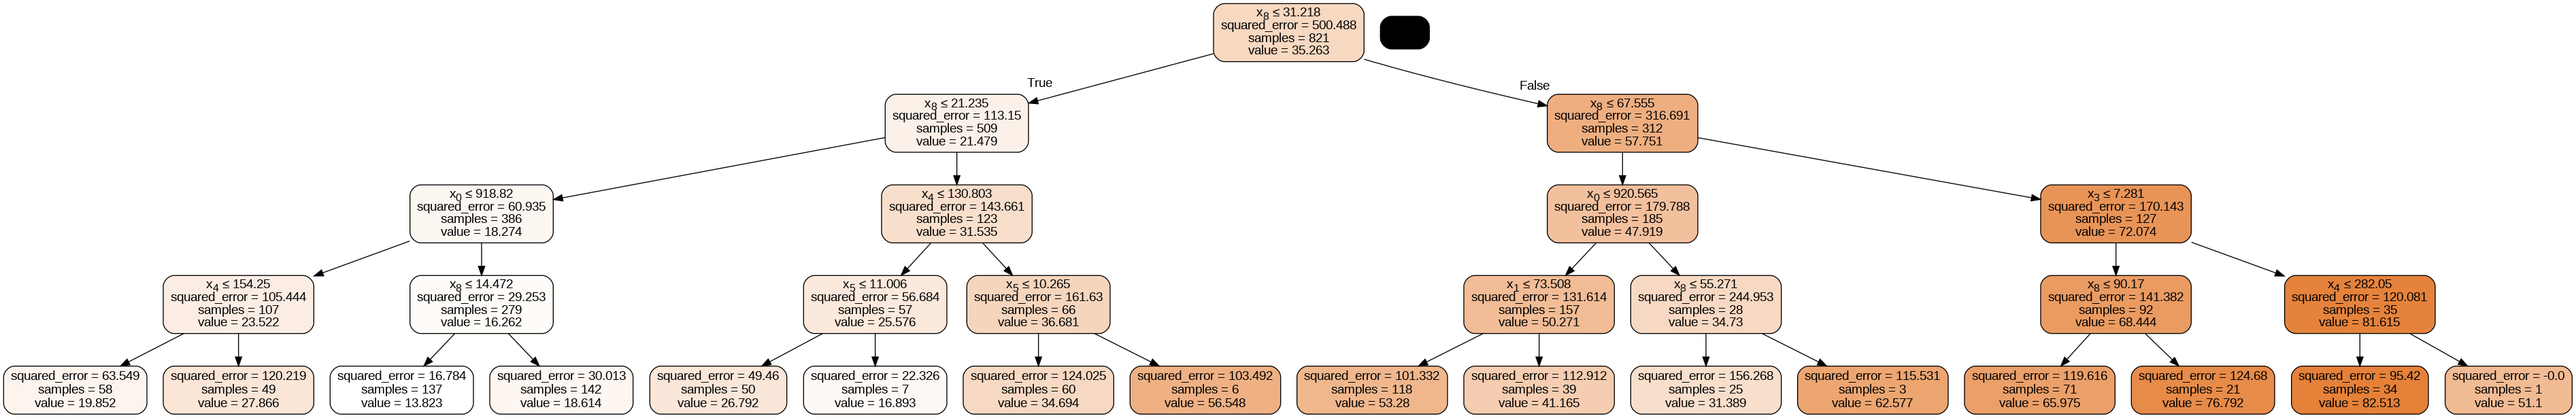

In [ ]:
dot_tree = export_graphviz(decision_tree = dtr,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           )
# Generate graph using pydot file
graph = pydotplus.graph_from_dot_data(dot_tree)

# Display the graph
Image(graph.create_png())

Removing Max depth to see tree till the end

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

print('Training R^2 Squared:', dtr.score(X_train, y_train))
print('Testing R^2 Squared: ', dtr.score(X_test, y_test))

Training R^2 Squared: 1.0
Testing R^2 Squared:  0.7342701218886805


In [ ]:
dot_tree = export_graphviz(decision_tree = dtr,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           )
# Generate graph using pydot file
graph = pydotplus.graph_from_dot_data(dot_tree)

# Display the graph
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.527046 to fit

